In [164]:

from IPython import display
display.clear_output()
import numpy as np
import ultralytics
ultralytics.checks()
from ultralytics import YOLO
import torch
from IPython.display import display, Image
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
import collections
import os


Ultralytics YOLOv8.2.2 🚀 Python-3.8.0 torch-2.2.1 CPU (Apple M1)
Setup complete ✅ (8 CPUs, 16.0 GB RAM, 259.8/460.4 GB disk)


In [8]:
# from roboflow import Roboflow
# rf = Roboflow(api_key="FPMUpkcgXPXar7iXvDot")
# project = rf.workspace("um-ajvmw").project("kneeoa-2")
# version = project.version(1)
# dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.2, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to kneeOA-2-1 in yolov8:: 100%|██████████| 1224/1224 [00:00<00:00, 2158.93it/s]


In [2]:
model = YOLO("best.pt")

In [141]:
with torch.no_grad():
    results = model.predict(task="segment", source="9003175L.png", conf=0.25, hide_labels=True, show_conf=False, save=False, augment=False, boxes=False) 

WARNING ⚠️ 'hide_labels' is deprecated and will be removed in 'ultralytics 8.399999999999999' in the future. Please use 'show_labels' instead.
WARNING ⚠️ 'boxes' is deprecated and will be removed in 'ultralytics 8.399999999999999' in the future. Please use 'show_boxes' instead.

image 1/1 /Users/namle/Desktop/SegJSW/9003175L.png: 640x640 1 femur, 1 tibia, 1349.3ms
Speed: 21.4ms preprocess, 1349.3ms inference, 97.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict5


In [166]:
new_label={
    0:0,
    1:1,
    2:1,
    3:2,
    4:2
        }

In [167]:
PATH = "data/train/"
xdata = collections.defaultdict(list)
ytrain = []
for classes in [0,1,2,3,4]:
    ls =  os.listdir(PATH+str(classes))
    print(f"Processing images class: {classes}")
    for samples in ls:
        img = cv2.resize(cv2.imread(PATH+str(classes)+'/'+samples),(224,224))
        img = img.transpose((2, 0, 1))
        xdata[new_label[classes]].append(img)
        ytrain.append(new_label[classes])

Processing images class: 0
Processing images class: 1
Processing images class: 2
Processing images class: 3
Processing images class: 4


In [142]:
img = cv2.imread("/Users/namle/Desktop/SegJSW/runs/segment/predict5/9003175L.png")


In [328]:
def preprocess_yolo(results):
    contours = []
    upper_mask = np.zeros((224,224), np.uint8)
    lower_mask = np.zeros((224,224), np.uint8)
    b_mask = np.zeros((224,224), np.uint8)
    for r in results:
        
        img = np.copy(r.orig_img)
        img_name = Path(r.path).stem  # source image base-name
        
        for ci, c in enumerate(r):
            label = c.names[c.boxes.cls.tolist().pop()]
            
            contour = c.masks.xy.pop().astype(np.int32).reshape(-1, 1, 2)
            contours.append(contour)
            _ = cv2.drawContours(b_mask, [contours[-1]], -1, 255, 1)
            mask3ch = cv2.cvtColor(b_mask, cv2.COLOR_GRAY2BGR)
            # res.append(mask3ch)
            isolated = cv2.bitwise_and(mask3ch, img)



        _ = cv2.drawContours(upper_mask, [contours[0]], -1, 255, 1)
        _ = cv2.drawContours(lower_mask, [contours[1]], -1, 255, 1)
        
    nonzero = b_mask.nonzero() 
    nonzero_upper = upper_mask.nonzero() 
    nonzero_lower = lower_mask.nonzero()   
    upper_point = []
    lower_point = []
    point =[]
    for i in range(nonzero_upper[1].shape[0]):
        upper_point.append([nonzero_upper[1][i], nonzero_upper[0][i]])
    for i in range(nonzero_lower[1].shape[0]):
        lower_point.append([nonzero_lower[1][i], nonzero_lower[0][i]])
    for i in range(nonzero[1].shape[0]):
        point.append([nonzero[1][i], nonzero[0][i]])


    upper_point = np.array(upper_point)
    lower_point = np.array(lower_point)
    point  = np.array(point)
    upper_point = np.array([p for p in list(upper_point) if p[1]!=1])
    lower_point = np.array([p for p in list(lower_point) if p[1]!=223])
    return mask3ch,point,upper_point,lower_point  
mask3ch,point,upper_point,lower_point   = preprocess_yolo(results)
    

In [329]:
# contours = []
# upper_mask = np.zeros(img.shape[:2], np.uint8)
# lower_mask = np.zeros(img.shape[:2], np.uint8)
# b_mask = np.zeros(img.shape[:2], np.uint8)
# for r in results:
    
#     img = np.copy(r.orig_img)
#     img_name = Path(r.path).stem  # source image base-name
    
#     for ci, c in enumerate(r):
#         label = c.names[c.boxes.cls.tolist().pop()]
        
#         contour = c.masks.xy.pop().astype(np.int32).reshape(-1, 1, 2)
#         contours.append(contour)
#         _ = cv2.drawContours(b_mask, [contours[-1]], -1, 255, 1)
#         mask3ch = cv2.cvtColor(b_mask, cv2.COLOR_GRAY2BGR)
#         # res.append(mask3ch)
#         isolated = cv2.bitwise_and(mask3ch, img)



#     _ = cv2.drawContours(upper_mask, [contours[0]], -1, 255, 1)
#     _ = cv2.drawContours(lower_mask, [contours[1]], -1, 255, 1)
     
# nonzero = b_mask.nonzero() 
# nonzero_upper = upper_mask.nonzero() 
# nonzero_lower = lower_mask.nonzero()     
        

        

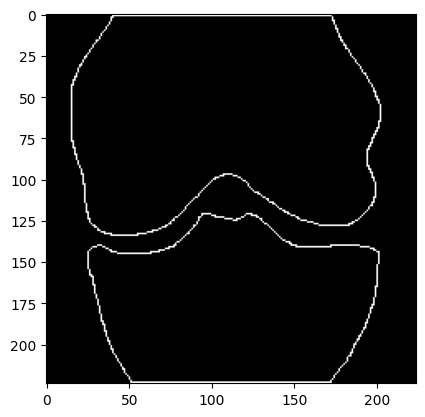

In [330]:
plt.imshow(mask3ch)

In [331]:
b_mask.shape

(224, 224)

In [332]:
# upper_point = []
# lower_point = []
# point =[]
# for i in range(nonzero_upper[1].shape[0]):
#     upper_point.append([nonzero_upper[1][i], nonzero_upper[0][i]])
# for i in range(nonzero_lower[1].shape[0]):
#     lower_point.append([nonzero_lower[1][i], nonzero_lower[0][i]])
# for i in range(nonzero[1].shape[0]):
#     point.append([nonzero[1][i], nonzero[0][i]])


# upper_point = np.array(upper_point)
# lower_point = np.array(lower_point)
# point  = np.array(point)

In [333]:
# x_min_upper = np.min(upper_point[:,0])
# x_max_upper = np.max(upper_point[:,0])
# x_min_lower =np.min(lower_point[:,0])
# x_max_lower =   np.max(lower_point[:,0])

# y_min_upper = np.min(upper_point[:,1])
# y_max_upper = np.max(upper_point[:,1])
# y_min_lower =np.min(lower_point[:,1])
# y_max_lower =   np.max(lower_point[:,1])

# x_min = np.min([x_min_upper,x_min_lower])
# x_max = np.min([x_max_upper,x_max_lower])

delete bottom and top line


Get 4 point 

In [334]:
def get_4_contour_point(point,upper_point,lower_point):
    
    x_min_upper = np.min(upper_point[:,0])
    x_max_upper = np.max(upper_point[:,0])
    x_min_lower =np.min(lower_point[:,0])
    x_max_lower =   np.max(lower_point[:,0])

    y_min_upper = np.min(upper_point[:,1])
    y_max_upper = np.max(upper_point[:,1])
    y_min_lower =np.min(lower_point[:,1])
    y_max_lower =   np.max(lower_point[:,1])

    x_min = np.max([x_min_upper,x_min_lower])
    x_max = np.min([x_max_upper,x_max_lower])
    p_intersect = []
    for p in upper_point:
        if p[1] == y_min_lower:
            if  not p_intersect: 
                p_intersect.append(p)
            else:
                if abs(p[0] - p_intersect[-1][0])>=10:
                    p_intersect.append(p)
    x_min_left = max(p_intersect[0][0],x_min_upper,x_min_lower)
    x_max_left= p_intersect[1][0]
    x_min_right= p_intersect[2][0]
    x_max_right = min(p_intersect[3][0],x_max_upper,x_max_lower)

    # return  x_min_left,x_max_left,x_min_right,x_max_right
    return x_min_upper,x_max_upper,x_min_lower,x_max_lower,x_min,x_max

x_min_upper,x_max_upper,x_min_lower,x_max_lower,x_min,x_max= get_4_contour_point(point,upper_point,lower_point)



In [335]:
# p_intersect = []
# for p in upper_point:
#     if p[1] == y_min_lower:
#         if  not p_intersect: 
#             p_intersect.append(p)
#         else:
#             if abs(p[0] - p_intersect[-1][0])>=10:
#                 p_intersect.append(p)
            


In [336]:
# x_min_left = max(p_intersect[0][0],x_min_upper,x_min_lower)
# x_max_left= p_intersect[1][0]
# x_min_right= p_intersect[2][0]
# x_max_right = min(p_intersect[3][0],x_max_upper,x_max_lower)

In [337]:
def get_unique_pixel_upper(lst):
    new_lst = []
    unique_set = set()
    for ele in reversed(lst):
        if ele[0] not in unique_set:
            unique_set.add(ele[0])
            new_lst.append(ele)
    return sorted(new_lst, key=lambda x: x[0])

def get_unique_pixel_lower(lst):
    new_lst = []
    unique_set = set()
    for ele in lst:
        if ele[0] not in unique_set:
            unique_set.add(ele[0])
            new_lst.append(ele)
    return sorted(new_lst, key=lambda x: x[0])

In [357]:
def get_4_set_point(x_min_upper,x_max_upper,x_min_lower,x_max_lower,x_min,x_max):
    global upper_point,lower_point
    upper_point = get_unique_pixel_upper(upper_point)
    lower_point = get_unique_pixel_lower(lower_point)
    upper_left = []
    upper_right = []
    lower_left = []
    lower_right = []

    mid_point = int((x_min_upper+x_max_upper+x_min_lower+x_max_lower)/4)
    l = int((x_max_upper-x_min_upper+ x_max_lower-x_min_lower)/4)
    r =0.2
    remove_range = [i for i in range(int(mid_point-r*l/2),int(mid_point+r*l/2))]
    left = int(mid_point-r*l/2)
    right = int(mid_point+r*l/2)
    for point in upper_point:
        if point[0] not in remove_range:
            if point[0]<= left  and point[0]>=x_min+l//8:
                upper_left.append(point)
            if point[0] >=right and point[0]<=x_max-l//8:
                upper_right.append(point)

    for point in lower_point:
        if point[0] not in remove_range:
            if point[0]<= left  and point[0]>=x_min+l//8:
                lower_left.append(point)
            if point[0] >=right and point[0]<=x_max-l//8:
                lower_right.append(point)
    # upper_right = get_unique_pixel(upper_right)
    # upper_left= get_unique_pixel(upper_left)
    # lower_right = get_unique_pixel(lower_right)
    # lower_left = get_unique_pixel(lower_left)
    return upper_left,upper_right,lower_left,lower_right

upper_left,upper_right,lower_left,lower_right = get_4_set_point(x_min_upper,x_max_upper,x_min_lower,x_max_lower,x_min,x_max) 


In [358]:
# def get_4_set_point(x_min_upper,x_max_upper,x_min_lower,x_max_lower):
#     global upper_point,lower_point
#     upper_point = sorted(upper_point, key=lambda x: x[0])
#     lower_point = sorted(lower_point, key=lambda x: x[0])
#     upper_point = get_unique_pixel(upper_point)
#     lower_point = get_unique_pixel(lower_point)
#     upper_left = []
#     upper_right = []
#     lower_left = []
#     lower_right = []

#     mid_point = 
#     for p in upper_point:
#         if p[1]>100 and  p[0] in range(x_min_left,x_max_left):
#             upper_left.append(p)
#     for p in upper_point:
#         if p[1]>100 and p[0] in range(x_min_right,x_max_right):
#             upper_right.append(p)
#     for p in lower_point:
#         if p[1]<150 and p[0] in range(x_min_left,x_max_left):
#             lower_left.append(p)
#     for p in lower_point:
#         if p[1]<150  and p[0] in range(x_min_right,x_max_right):
#             lower_right.append(p)
#     # upper_right = get_unique_pixel(upper_right)
#     # upper_left= get_unique_pixel(upper_left)
#     # lower_right = get_unique_pixel(lower_right)
#     # lower_left = get_unique_pixel(lower_left)
#     return upper_left,upper_right,lower_left,lower_right

# upper_left,upper_right,lower_left,lower_right = get_4_set_point(x_min_left,x_max_left,x_min_right,x_max_right) 


In [359]:
# upper_point = sorted(upper_point, key=lambda x: x[0])
# lower_point = sorted(lower_point, key=lambda x: x[0])


In [360]:
# upper_left = []
# upper_right = []
# lower_left = []
# lower_right = []

# for p in upper_point:
#     if p[1]>100 and  p[0] in range(x_min_left,x_max_left):
#         upper_left.append(p)
# for p in upper_point:
#     if p[1]>100 and p[0] in range(x_min_right,x_max_right):
#         upper_right.append(p)
# for p in lower_point:
#     if p[1]<150 and p[0] in range(x_min_left,x_max_left):
#         lower_left.append(p)
# for p in lower_point:
#     if p[1]<150  and p[0] in range(x_min_right,x_max_right):
#         lower_right.append(p)
        

In [361]:
# upper_right = get_unique_pixel(upper_right)
# upper_left= get_unique_pixel(upper_left)
# lower_right = get_unique_pixel(lower_right)
# lower_left = get_unique_pixel(lower_left)

In [364]:
test = mask3ch.copy()
for i in range(0,len(upper_left),3): 
    cv2.line(test,upper_left[i],lower_left[i],255,1)
for i in range(0,len(upper_right),3): 
    cv2.line(test,upper_right[i],lower_right[i],255,1)

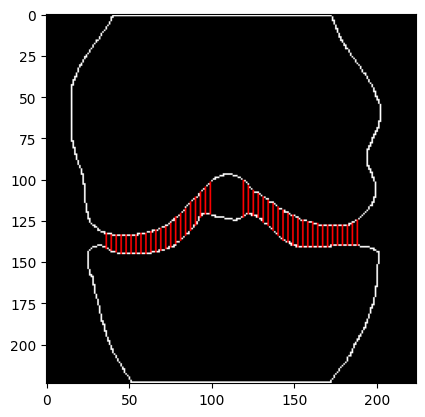

In [365]:
plt.imshow(test)

In [1]:
from preprocess import *

Ultralytics YOLOv8.2.2 🚀 Python-3.8.0 torch-2.2.1 CPU (Apple M1)
Setup complete ✅ (8 CPUs, 16.0 GB RAM, 287.3/460.4 GB disk)


In [2]:
process_gd= Preprocess_GD()

In [3]:
yolo_process = Preprocess_yolo()

In [4]:
Xtrain,Ytrain,Xtest,Ytest,Xval,Yval  = process_gd.pipeline()

Processing images class: 0
Processing images class: 1
Processing images class: 2
Processing images class: 3
Processing images class: 4
Processing images class: 0
Processing images class: 1
Processing images class: 2
Processing images class: 3
Processing images class: 4
Processing images class: 0
Processing images class: 1
Processing images class: 2
Processing images class: 3
Processing images class: 4


In [5]:
Xtrain[0].size()

torch.Size([3, 224, 224])

In [8]:
maskch,upper_left,upper_right,lower_left,lower_right = yolo_process.pipeline(Xtrain[5])

WARNING ⚠️ 'hide_labels' is deprecated and will be removed in 'ultralytics 8.399999999999999' in the future. Please use 'show_labels' instead.


WARNING ⚠️ 'boxes' is deprecated and will be removed in 'ultralytics 8.399999999999999' in the future. Please use 'show_boxes' instead.

WARNING ⚠️ torch.Tensor inputs should be BCHW i.e. shape(1, 3, 640, 640) divisible by stride 32. Input shape(3, 224, 224) is incompatible.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 246.0. Dividing input by 255.
0: 224x224 1 femur, 1 tibia, 359.8ms
Speed: 2.5ms preprocess, 359.8ms inference, 13.8ms postprocess per image at shape (1, 3, 224, 224)


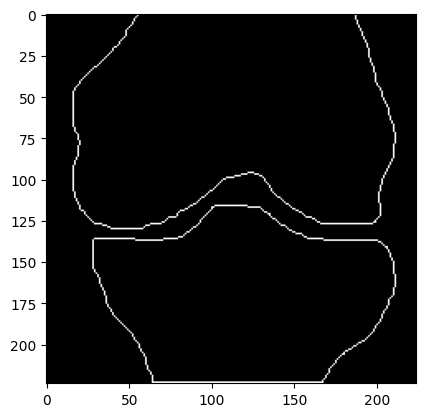

In [9]:
plt.imshow(maskch)

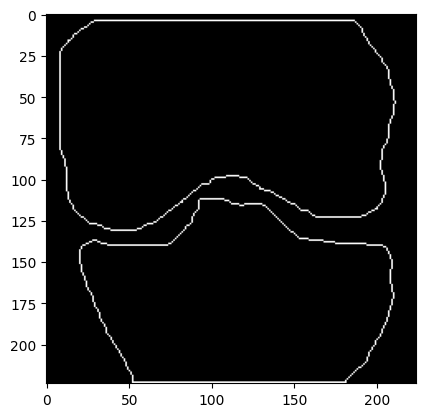

In [7]:
plt.imshow(mask3ch)

In [4]:
mask3ch,upper_left,upper_right,lower_left,lower_right = yolo_process.pipeline()

WARNING ⚠️ 'hide_labels' is deprecated and will be removed in 'ultralytics 8.399999999999999' in the future. Please use 'show_labels' instead.
WARNING ⚠️ 'boxes' is deprecated and will be removed in 'ultralytics 8.399999999999999' in the future. Please use 'show_boxes' instead.

image 1/1 /Users/namle/Desktop/SegJSW/9003175L.png: 640x640 1 femur, 1 tibia, 1276.7ms
Speed: 6.6ms preprocess, 1276.7ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)


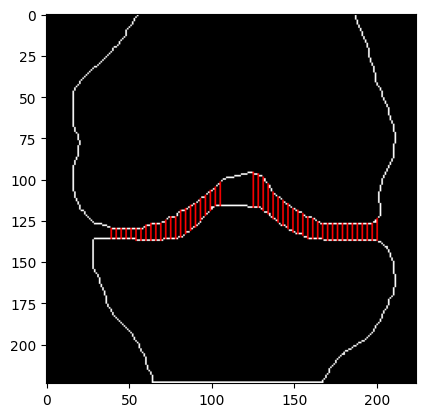

In [11]:
yolo_process.visual_result(maskch,upper_left,upper_right,lower_left,lower_right)